In [24]:
# check scikit-learn version
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
import joblib
from sklearn.tree import export_graphviz


In [25]:
lan_dataset = np.loadtxt('/Users/renegonzalez/Desktop/DNN LoL/lan_dataset.csv', delimiter=',', dtype=np.float32)
na_dataset = np.loadtxt('/Users/renegonzalez/Desktop/DNN LoL/na_dataset.csv', delimiter=',', dtype=np.float32)

np.random.shuffle(lan_dataset)
np.random.shuffle(na_dataset)

x_train = lan_dataset[:, 0:44]
y_train = lan_dataset[:, 44]

x_test = na_dataset[:, 0:44]
y_test = na_dataset[:, 44]

print(len(x_train))
print(len(y_train))

print(len(x_test))
print(len(y_test))


12458
12458
4552
4552


In [26]:
model = GradientBoostingClassifier(n_estimators=55, learning_rate=0.14)

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10)
model_accu_stratified = []

for train_index, test_index in skf.split(x_train, y_train):
    x_train_fold, x_test_fold = x_train[train_index], x_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    model.fit(x_train_fold, y_train_fold)
    model_accu_stratified.append(model.score(x_test_fold, y_test_fold))

# Print the output.
print("List of possible accuracy:", model_accu_stratified)
print(
    "\nMaximum Accuracy That can be obtained from this model is:",
    max(model_accu_stratified) * 100,
    "%",
)
print("\nMinimum Accuracy:", min(model_accu_stratified) * 100, "%")
print("\nOverall Accuracy:", np.mean(model_accu_stratified) * 100, "%")
print("\nStandard Deviation is:", np.std(model_accu_stratified))


List of possible accuracy: [0.8956661316211878, 0.9036918138041734, 0.9012841091492777, 0.884430176565008, 0.8956661316211878, 0.9157303370786517, 0.891653290529695, 0.8964686998394864, 0.8923694779116466, 0.8947791164658635]

Maximum Accuracy That can be obtained from this model is: 91.57303370786516 %

Minimum Accuracy: 88.4430176565008 %

Overall Accuracy: 89.71739284586178 %

Standard Deviation is: 0.00794014792418628


In [27]:
model = GradientBoostingClassifier(n_estimators=55, learning_rate=0.14)
model.fit(x_train, y_train)

print(f"Accuracy: {model.score(x_test, y_test)*100}%")

predictions = model.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report:")
print(classification_report(y_test, predictions))


Accuracy: 88.62038664323374%
Confusion Matrix:
[[1989  244]
 [ 274 2045]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88      2233
         1.0       0.89      0.88      0.89      2319

    accuracy                           0.89      4552
   macro avg       0.89      0.89      0.89      4552
weighted avg       0.89      0.89      0.89      4552



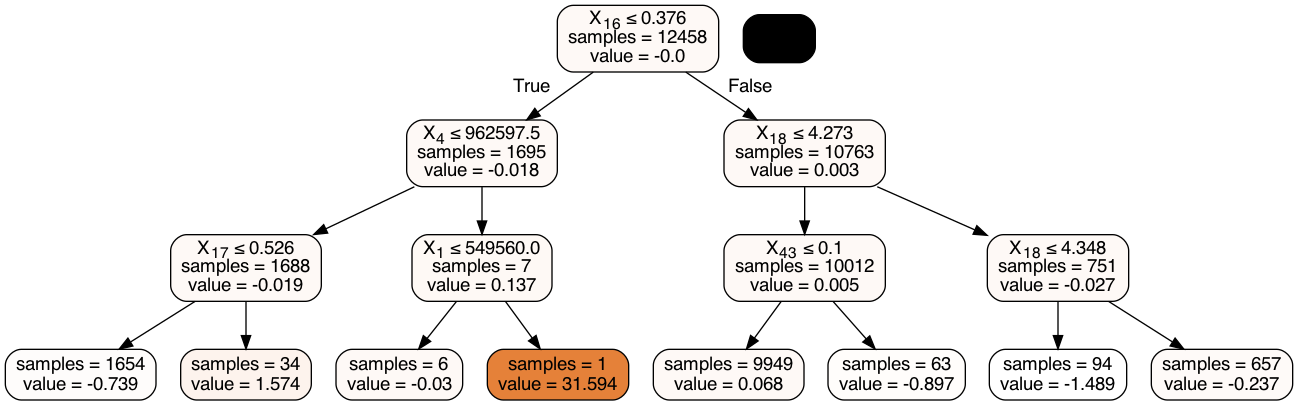

In [28]:
# Get the tree number 42
from IPython.display import Image
from pydotplus import graph_from_dot_data
sub_tree_42 = model.estimators_[44, 0]

# Visualization
# Install graphviz: https://www.graphviz.org/download/
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False,  # enable them if you want
)
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())


In [29]:
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(model, filename)


['finalized_model.sav']